# Jupyter Notebook: Parsing JSON and Visualizing Data

In this notebook, we will load a JSON file from an API, convert it to a pandas DataFrame, and then create visualizations using seaborn.

In [41]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [42]:
# Import necessary libraries
import requests  # for making API calls
import json  # for parsing JSON files
import pandas as pd  # for data manipulation
import seaborn as sns  # for visualization

# Customize the Visualization - Set a custom Seaborn style
sns.set_style("darkgrid")

## Step 1: Fetch Data from a JSON API - Example of fetching data from a JSON API

In [43]:
# Fetch the data from the API
api_url = "https://api.waqi.info/feed/@6316/?token="
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON data
    print("Data fetched successfully!")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Data fetched successfully!


## Step 2: Load Forecast Data into Pandas DataFrame

In [44]:
# Extract forecast data from the API response
forecast_data = data['data']['forecast']['daily']

# Load the forecast data for different pollutants into DataFrames
pm10_df = pd.DataFrame(forecast_data['pm10'])
pm25_df = pd.DataFrame(forecast_data['pm25'])
o3_df = pd.DataFrame(forecast_data['o3'])
uvi_df = pd.DataFrame(forecast_data['uvi'])

# Display the first few rows of the PM10 DataFrame
pm10_df.head(10)

,avg,day,max,min
0,10,2024-09-15,13,6
1,6,2024-09-16,7,2
2,3,2024-09-17,5,1
3,9,2024-09-18,12,2
4,7,2024-09-19,10,5
5,7,2024-09-20,10,3
6,4,2024-09-21,6,2
7,1,2024-09-22,3,1


## Step 3: Load Forecast Data into Pandas DataFrame

In [45]:
# Display the first few rows of the pm25 DataFrame
pm25_df.head(10)

,avg,day,max,min
0,23,2024-09-15,30,14
1,15,2024-09-16,19,5
2,8,2024-09-17,15,3
3,12,2024-09-18,17,4
4,14,2024-09-19,18,9
5,14,2024-09-20,21,6
6,11,2024-09-21,14,8
7,4,2024-09-22,8,3


In [46]:
# Display the first few rows of the o3 DataFrame
o3_df.head(10)

,avg,day,max,min
0,13,2024-09-15,20,9
1,10,2024-09-16,13,8
2,10,2024-09-17,13,7
3,13,2024-09-18,18,9
4,14,2024-09-19,21,9
5,12,2024-09-20,20,7
6,16,2024-09-21,18,13
7,16,2024-09-22,18,13


In [47]:
# Display the first few rows of the uvi DataFrame
uvi_df.head(10)

,avg,day,max,min
0,1,2024-09-15,7,0
1,1,2024-09-16,6,0
2,1,2024-09-17,7,0
3,1,2024-09-18,8,0
4,1,2024-09-19,8,0
5,1,2024-09-20,8,0
6,1,2024-09-21,7,0
7,0,2024-09-22,0,0


## Step 4: Visualize Data using Seaborn

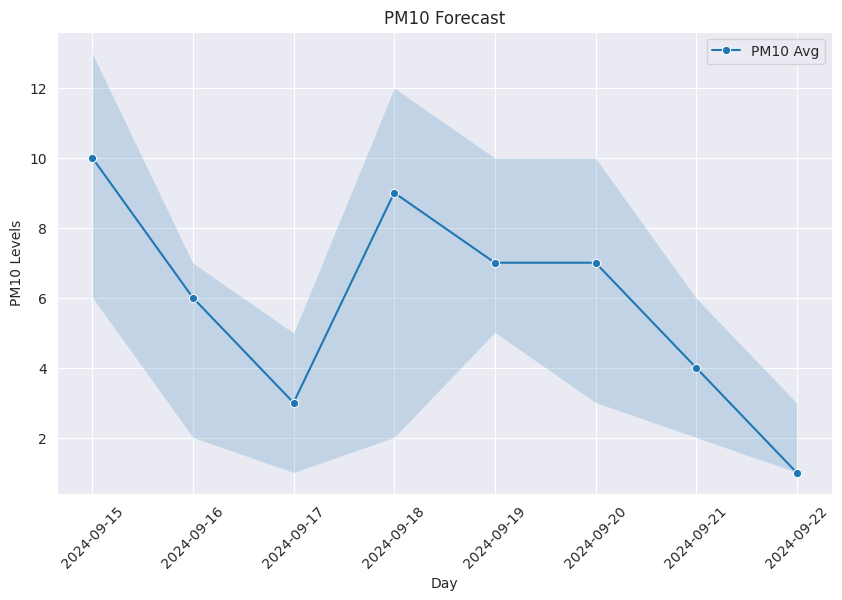

In [48]:
# Plotting the PM10 forecast data
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='avg', data=pm10_df, marker='o', label='PM10 Avg')
plt.fill_between(pm10_df['day'], pm10_df['min'], pm10_df['max'], alpha=0.2)
plt.title('PM10 Forecast')
plt.xlabel('Day')
plt.ylabel('PM10 Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

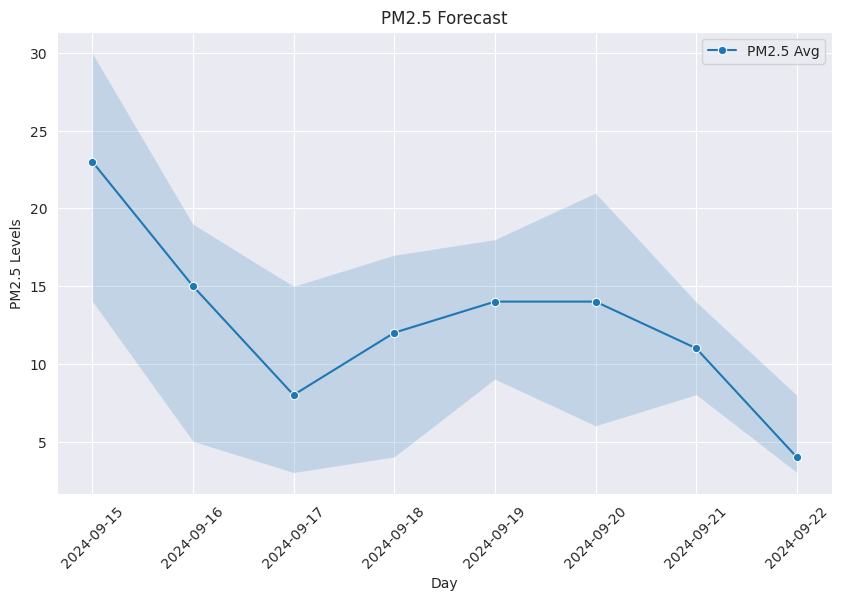

In [49]:
# Plotting the PM2.5 forecast data
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='avg', data=pm25_df, marker='o', label='PM2.5 Avg')
plt.fill_between(pm25_df['day'], pm25_df['min'], pm25_df['max'], alpha=0.2)
plt.title('PM2.5 Forecast')
plt.xlabel('Day')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

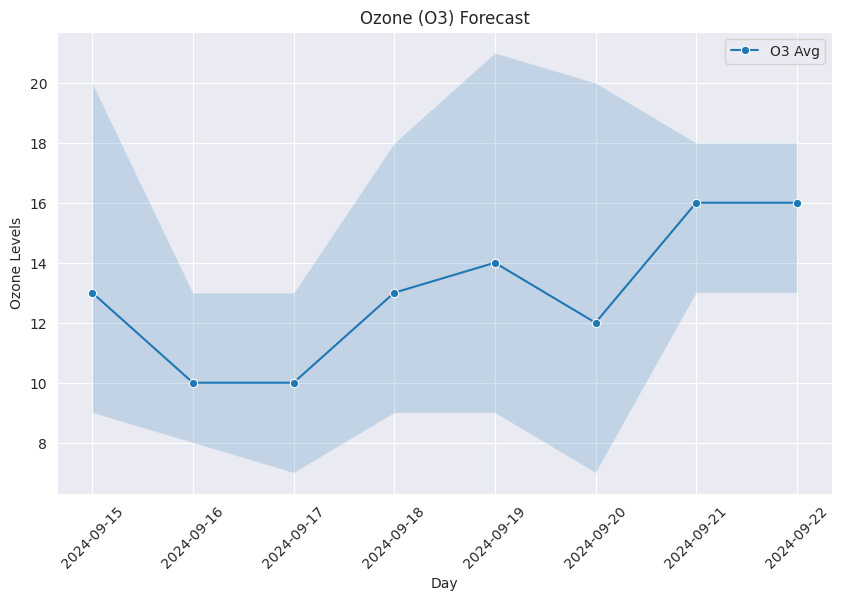

In [50]:
# Plotting the O3 forecast data
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='avg', data=o3_df, marker='o', label='O3 Avg')
plt.fill_between(o3_df['day'], o3_df['min'], o3_df['max'], alpha=0.2)
plt.title('Ozone (O3) Forecast')
plt.xlabel('Day')
plt.ylabel('Ozone Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

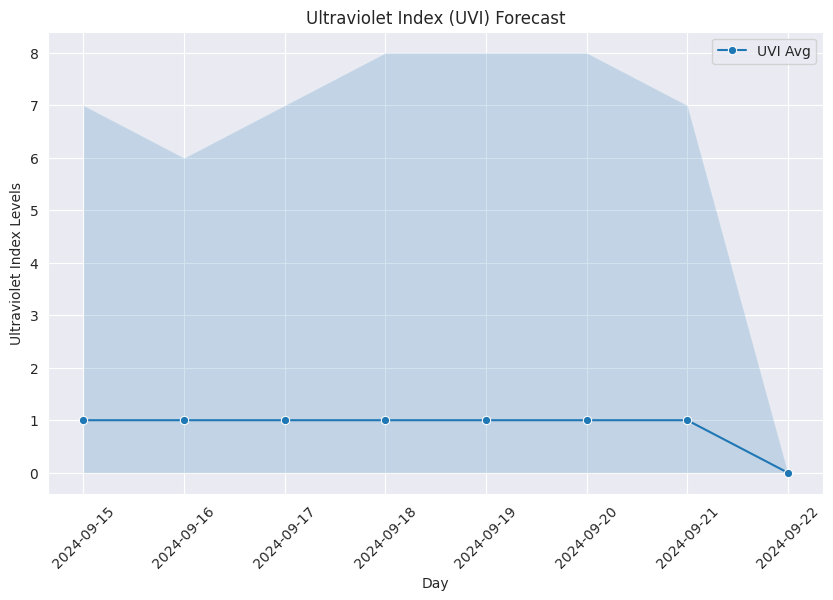

In [51]:
# Plotting the UVI forecast data
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='avg', data=uvi_df, marker='o', label='UVI Avg')
plt.fill_between(uvi_df['day'], uvi_df['min'], uvi_df['max'], alpha=0.2)
plt.title('Ultraviolet Index (UVI) Forecast')
plt.xlabel('Day')
plt.ylabel('Ultraviolet Index Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()